<a href="https://colab.research.google.com/github/nikhilans/appliance-energy-prediction/blob/main/CH_Nikhila_N_S_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data drive prediction of energy use of appliances

## Problem Statement

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

## Data Description

date time year-month-day hour:minute:second

* date - time year-month-day hour:minute:second
* Appliances, energy use in Wh (Dependent variable)
* lights - energy use of light fixtures in the house in Wh (Drop this column)
* T1 - Temperature in kitchen area, in Celsius
* RH1 - Humidity in kitchen area, in % 
* T2 - Temperature in living room area, in Celsius 
* RH2 - Humidity in living room area, in %
* T3 - Temperature in laundry room area
* RH3 - Humidity in laundry room area, in % 
* T4 - Temperature in office room, in Celsius 
* RH4 - Humidity in office room, in %
* T5 - Temperature in bathroom, in Celsius
* RH5 - Humidity in bathroom, in % 
* T6 - Temperature outside the building (north side), in Celsius
* RH6 - Humidity outside the building (north side), in %
* T7 - Temperature in ironing room, in Celsius
* RH7 - Humidity in ironing room, in % 
* T8 - Temperature in teenager room 2, in Celsius 
* RH8 - Humidity in teenager room 2, in %
* T9 - Temperature in parents room, in Celsius
* RH9 - Humidity in parents room, in % 
* T_out - Temperature outside (from Chievres weather station), in Celsius 
* Pressure - (from Chievres weather station), in mm Hg RHout 
* Humidity - outside (from Chievres weather station), in %
* Wind speed - (from Chievres weather station), in m/s
* Visibility - (from Chievres weather station), in km
* Tdewpoint - (from Chievres weather station), Â°C
* rv1 - Random variable 1, nondimensional
* rv2 - Random variable 2, nondimensional
<br>
<br>
Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.


In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 4: Machine Learning/Capstone Projects/Appliances Energy Prediction - Nikhila N S/data_application_energy.csv')

In [ ]:
df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [ ]:
df.tail()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00         430      10  ...  13.200000  34.118851  34.118851

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Divide the columns based on type

col_hum = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
col_temp = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

col_weather = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

col_randoms = ["rv1", "rv2"]

In [ ]:
df.describe()

Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

## Exploratory Data Analysis

### Dependent Variable

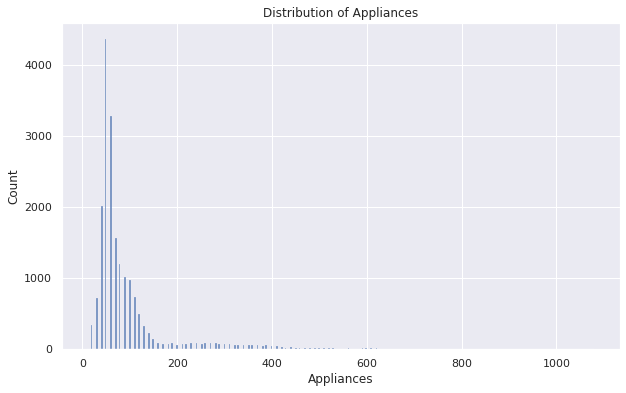

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='Appliances')
plt.title(f'Distribution of Appliances')
plt.show()

In [ ]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

Light column has 15252 entires with value = 0. It could mean there is no human presence in that room at that time; or it could be during the day where lights are not turned on.

### Humidity

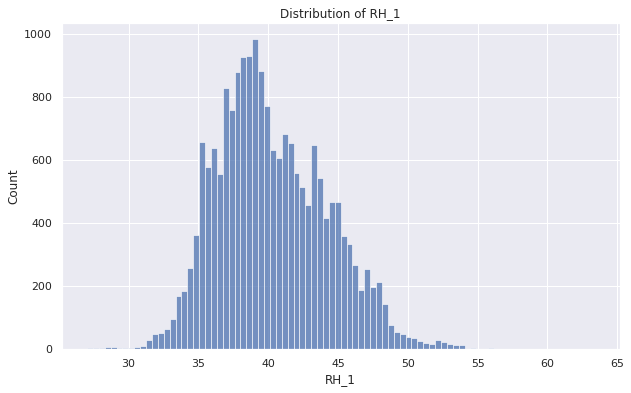

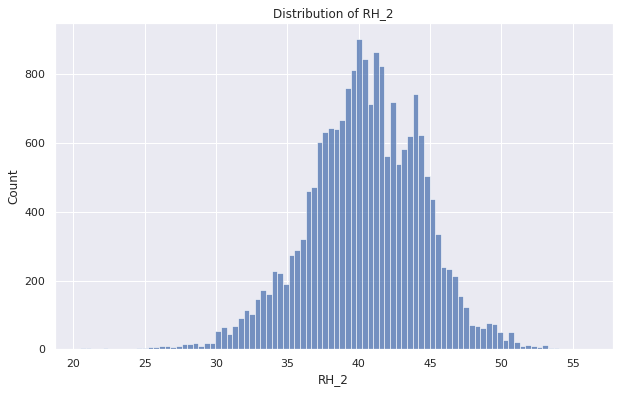

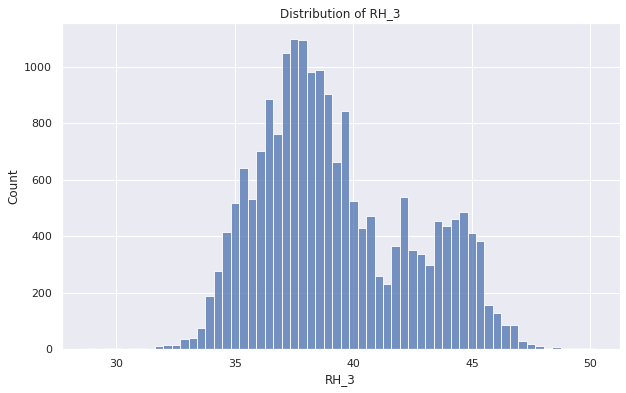

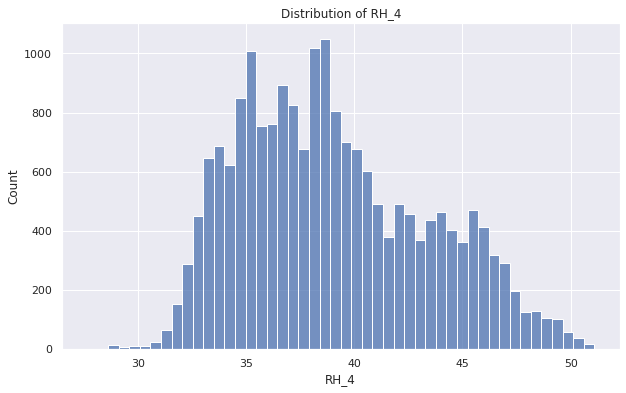

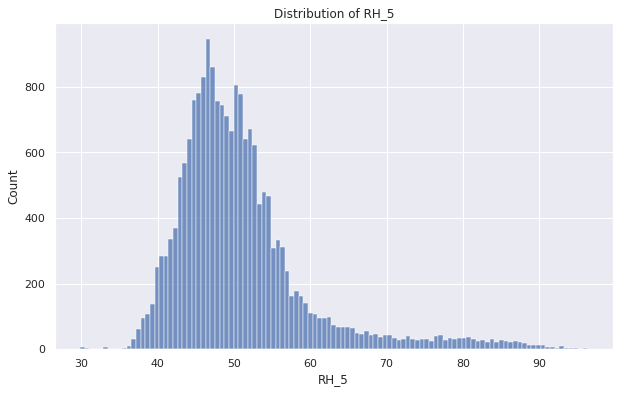

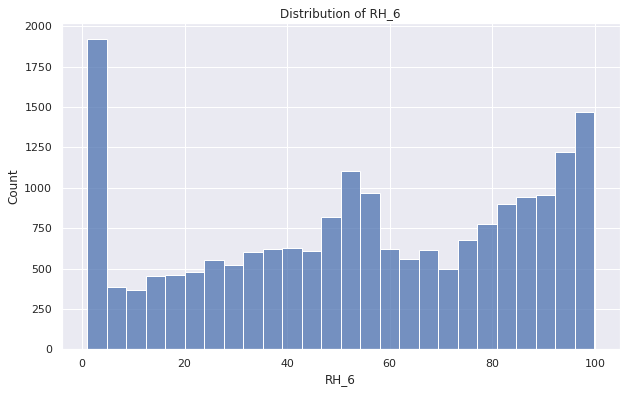

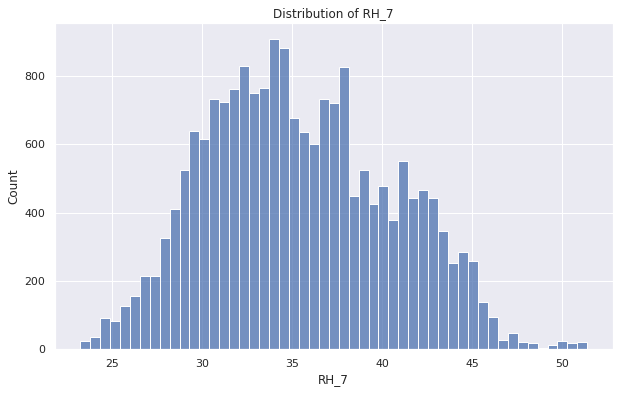

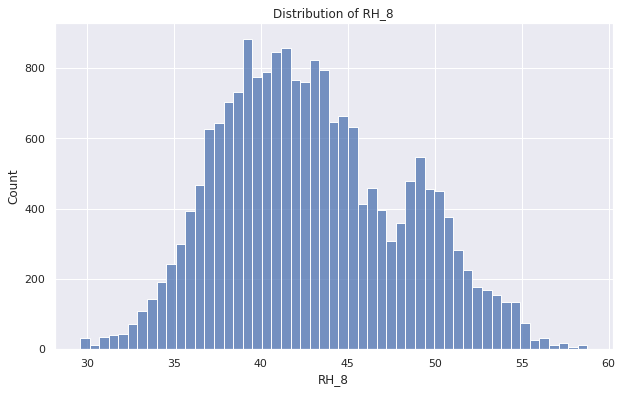

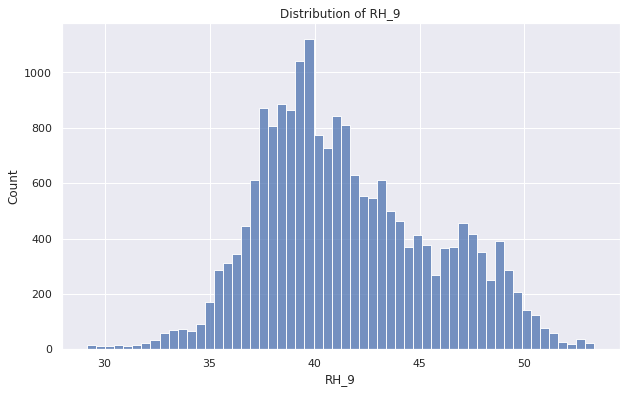

In [ ]:
for i, ii in enumerate(df[col_hum]):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

RH6 - Humidity Outside the building (north side) - doesn't follow of normal distribution

### Temperature

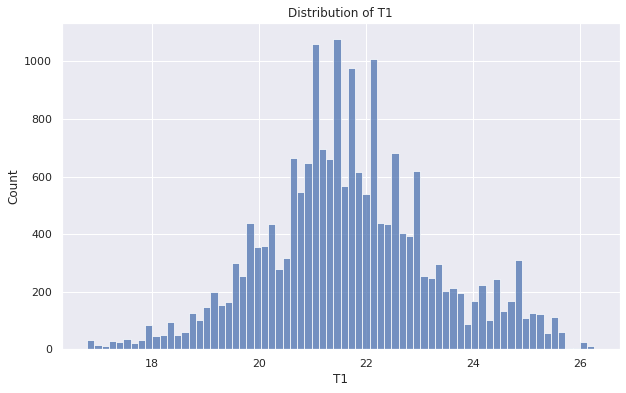

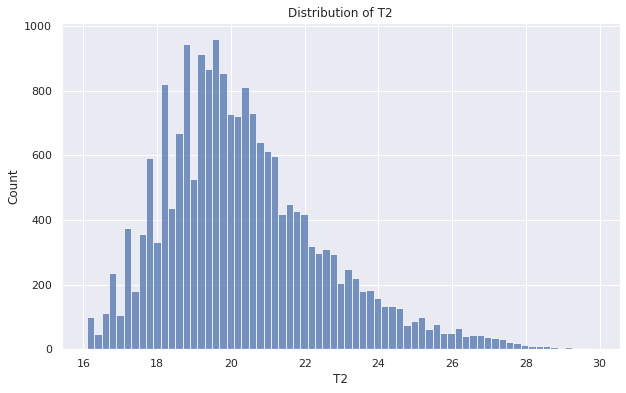

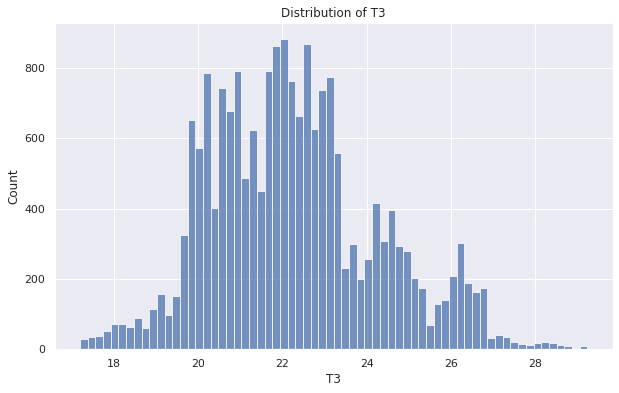

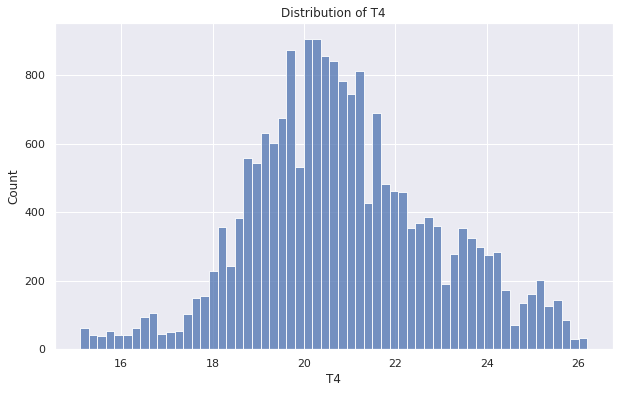

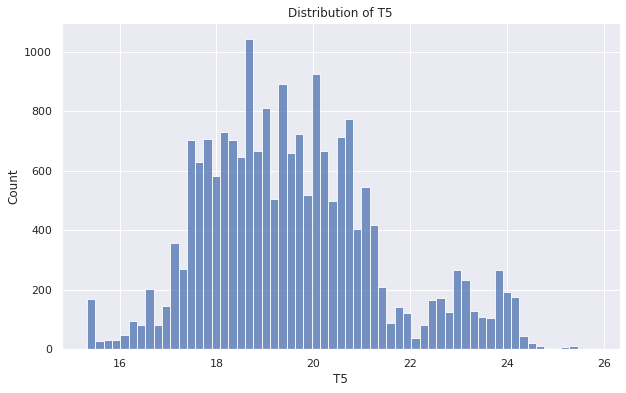

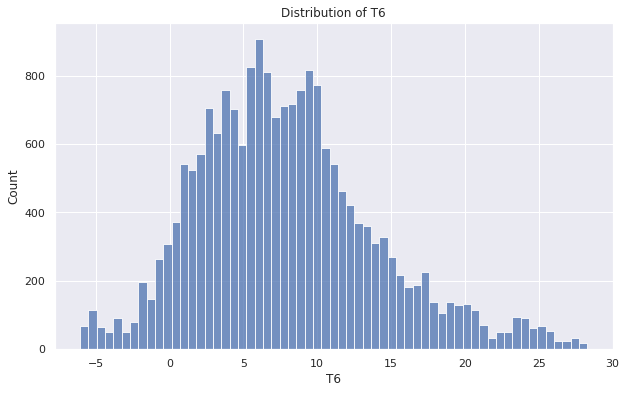

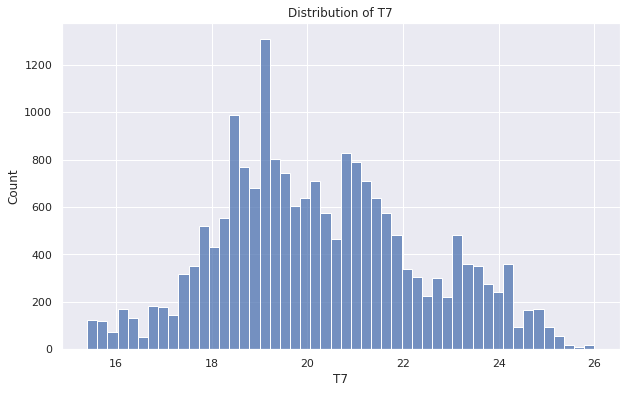

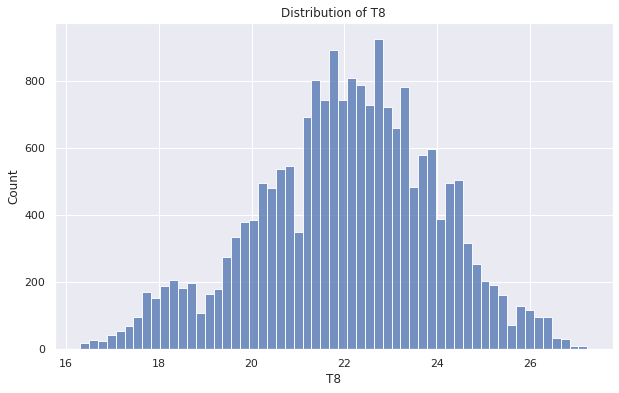

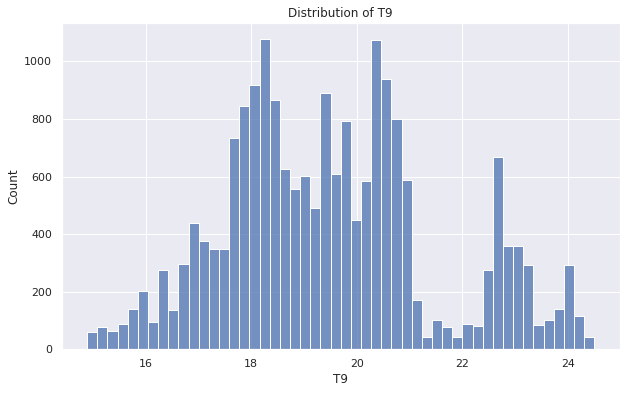

In [ ]:
for i, ii in enumerate(df[col_temp]):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

### Outside weather

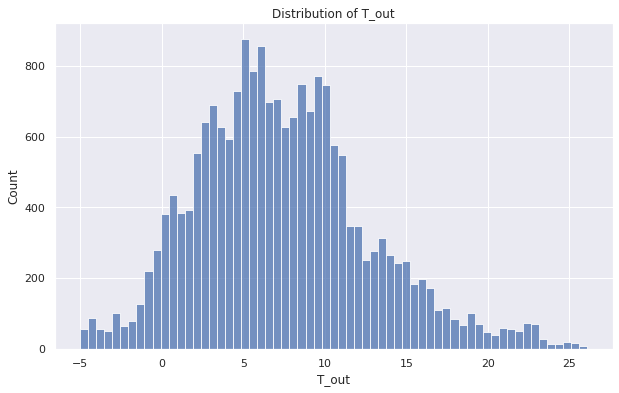

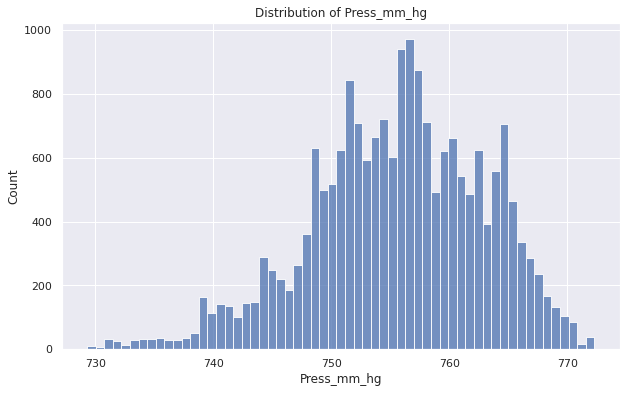

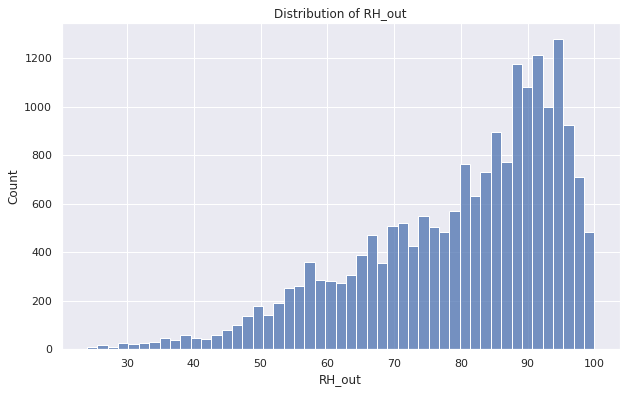

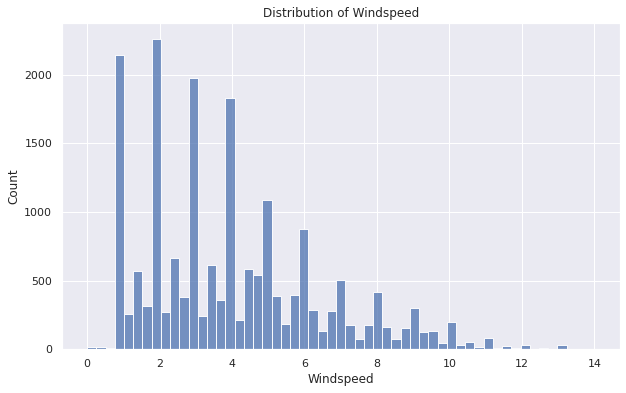

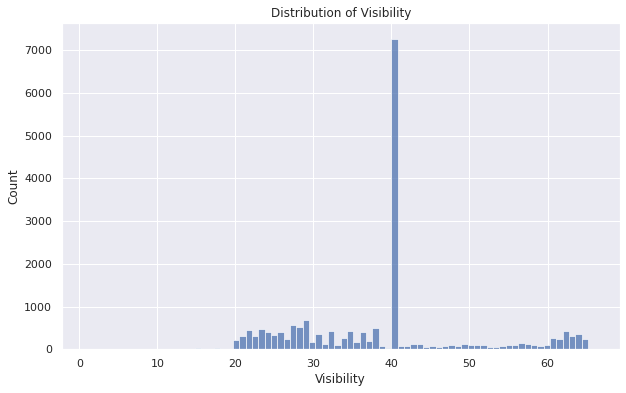

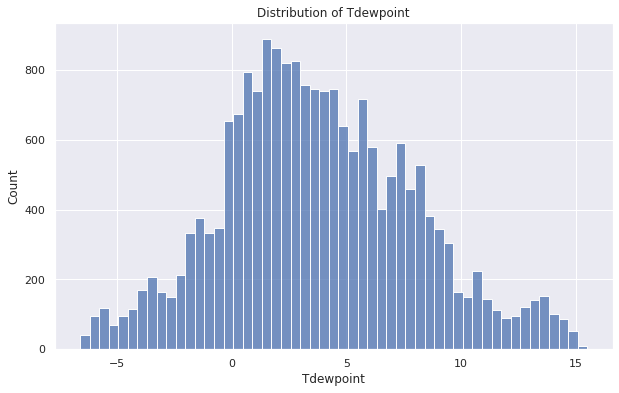

In [ ]:
for i, ii in enumerate(df[col_weather]):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

### Extracting date time features from the data column

In [ ]:
import time
import dateutil

df["exact_date"]=df['date'].str.split(' ').str[0]

df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
df["seconds"]=((df['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

df["week"]=(df['date'].str.split(' ').str[0])
df["week"]=(df['week'].apply(dateutil.parser.parse, dayfirst=True))
df["weekday"]=(df['week'].dt.dayofweek).astype(str).astype(int)
df["week"]=(df['week'].dt.day_name())

df.head(5)

date  Appliances  lights  ...  seconds     week  weekday
0  2016-01-11 17:00:00          60      30  ...        0  Tuesday        1
1  2016-01-11 17:10:00          60      30  ...      600  Tuesday        1
2  2016-01-11 17:20:00          50      30  ...     1200  Tuesday        1
3  2016-01-11 17:30:00          50      40  ...     1800  Tuesday        1
4  2016-01-11 17:40:00          60      40  ...     2400  Tuesday        1

[5 rows x 34 columns]

In [ ]:
 df['date'] = pd.to_datetime(df['date'])
 df.head()

date  Appliances  lights  ...  seconds     week  weekday
0 2016-01-11 17:00:00          60      30  ...        0  Tuesday        1
1 2016-01-11 17:10:00          60      30  ...      600  Tuesday        1
2 2016-01-11 17:20:00          50      30  ...     1200  Tuesday        1
3 2016-01-11 17:30:00          50      40  ...     1800  Tuesday        1
4 2016-01-11 17:40:00          60      40  ...     2400  Tuesday        1

[5 rows x 34 columns]

### Plotting features over time

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = px.line(df, x='date', y=df.Appliances)
fig.show()

In [ ]:
edadfsmall = df[0:2467].copy()

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces

fig.add_trace(
    go.Scatter(x=edadfsmall['date'], y=edadfsmall['Appliances'], 
               name="Appliances",
               mode='lines'),
    secondary_y=False,
)



fig.add_trace(
    go.Scatter(x=edadfsmall['date'], y=edadfsmall['lights'], 
               name='lights',
               mode='lines'),
    secondary_y=True,
)

fig.update_layout(
    title='Appliance and Light usage over two weeks',
    xaxis_title="Date")
    
fig.update_yaxes(title_text="Appliance Usage (in Wh)", secondary_y=False, color="blue")
fig.update_yaxes(title_text="Lights Usage (in Wh)", secondary_y=True, color="red")
    
fig.show()

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces

fig.add_trace(
    go.Scatter(x=edadfsmall['date'], y=edadfsmall['Appliances'], 
               name="Appliances",
               mode='lines'),
    secondary_y=False,
)

for i in col_temp:
    fig.add_trace(
        go.Scatter(x=edadfsmall['date'], y=edadfsmall[i], 
                   name=i,
                   mode='lines'),
        secondary_y=True,
    )

fig.update_layout(
    title='Appliance usage and Temperature over two weeks',
    xaxis_title="Date")
    
fig.update_yaxes(title_text="Appliance Usage (in Wh)", secondary_y=False, color="blue")
fig.update_yaxes(title_text="Temperature (in Celsius)", secondary_y=True)    
    
fig.show()

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces

fig.add_trace(
    go.Scatter(x=edadfsmall['date'], y=edadfsmall['Appliances'], 
               name="Appliances",
               mode='lines'),
    secondary_y=False,
)

for i in col_hum:
    fig.add_trace(
        go.Scatter(x=edadfsmall['date'], y=edadfsmall[i], 
                   name=i,
                   mode='lines'),
        secondary_y=True,
    )

fig.update_layout(
    title='Appliance usage and Humidity over two weeks',
    xaxis_title="Date")
    
fig.update_yaxes(title_text="Appliance Usage (in Wh)", secondary_y=False, color="blue")
fig.update_yaxes(title_text="humidity (in %)", secondary_y=True)    
    
fig.show()

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces

fig.add_trace(
    go.Scatter(x=edadfsmall['date'], y=edadfsmall['Appliances'], 
               name="Appliances",
               mode='lines'),
    secondary_y=False,
)

for i in col_weather:
    fig.add_trace(
        go.Scatter(x=edadfsmall['date'], y=edadfsmall[i], 
                   name=i,
                   mode='lines'),
        secondary_y=True,
    )
    
fig.update_layout(
    title='Appliance and Outside Variables over two weeks',
    xaxis_title="Date")
    
fig.update_yaxes(title_text="Appliance Usage (in Wh)", secondary_y=False, color="blue")
fig.update_yaxes(title_text="Arbitrary values", secondary_y=True)

fig.show()

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces

fig.add_trace(
    go.Scatter(x=edadfsmall['date'], y=edadfsmall['Appliances'], 
               name="Appliances",
               mode='lines'),
    secondary_y=False,
)
humiditycolumns = ['rv1', 'rv2']

for i in humiditycolumns:
    fig.add_trace(
        go.Scatter(x=edadfsmall['date'], y=edadfsmall[i], 
                   name=i,
                   mode='lines'),
        secondary_y=True,
    )
    
fig.update_layout(
    title='Appliance usage and Random variables over two weeks',
    xaxis_title="Date")
    
fig.update_yaxes(title_text="Appliance Usage (in Wh)", secondary_y=False, color="blue")
fig.update_yaxes(title_text="arbitrary value", secondary_y=True)

fig.show()

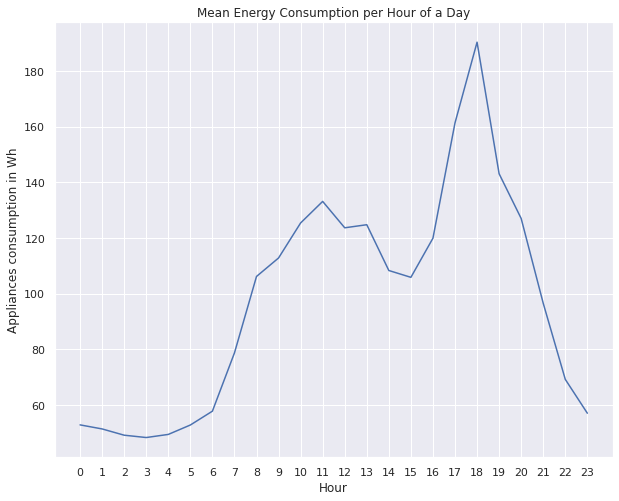

In [ ]:
df.groupby('hours')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

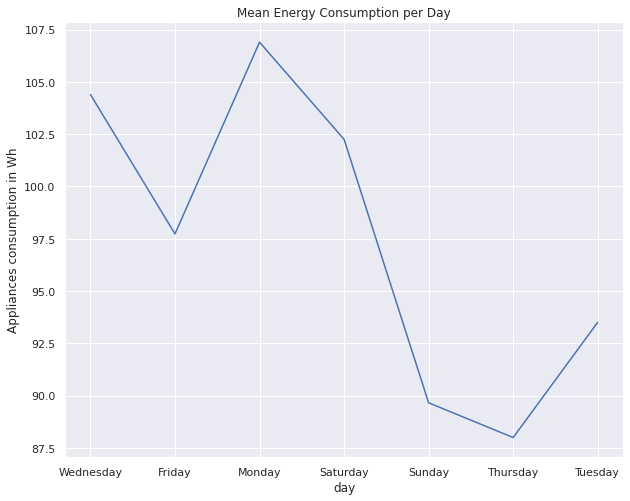

In [ ]:
df.groupby('week')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('day')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 7, 1))
plt.title('Mean Energy Consumption per Day')

plt.xticks(ticks);

In [ ]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(df["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df,index=["hours"],
               values="Appliances",columns=day_series,
               aggfunc=[np.mean],fill_value=0)

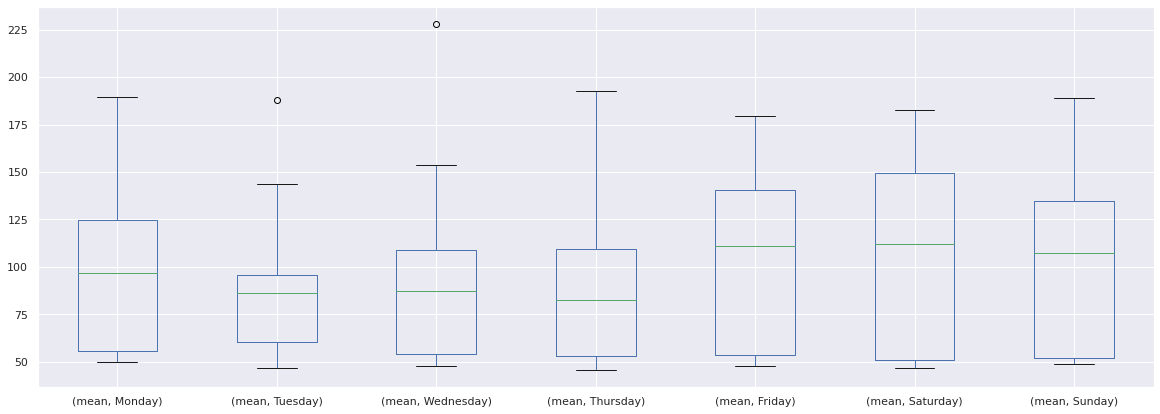

In [ ]:
table.plot.box(figsize=(20, 7))

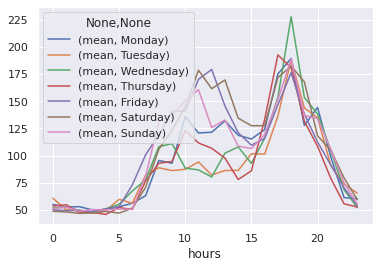

In [ ]:
table.plot()

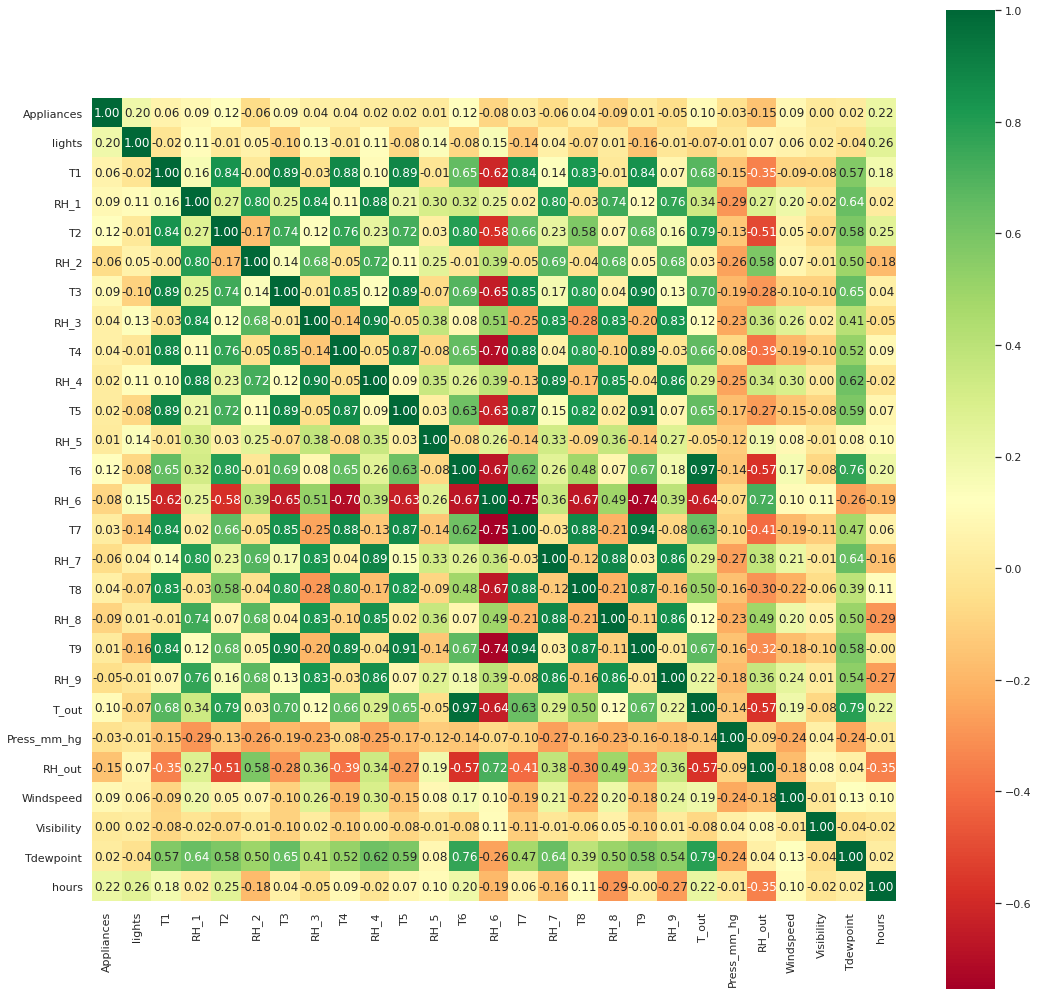

In [ ]:
col = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint','hours']
corr = df[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

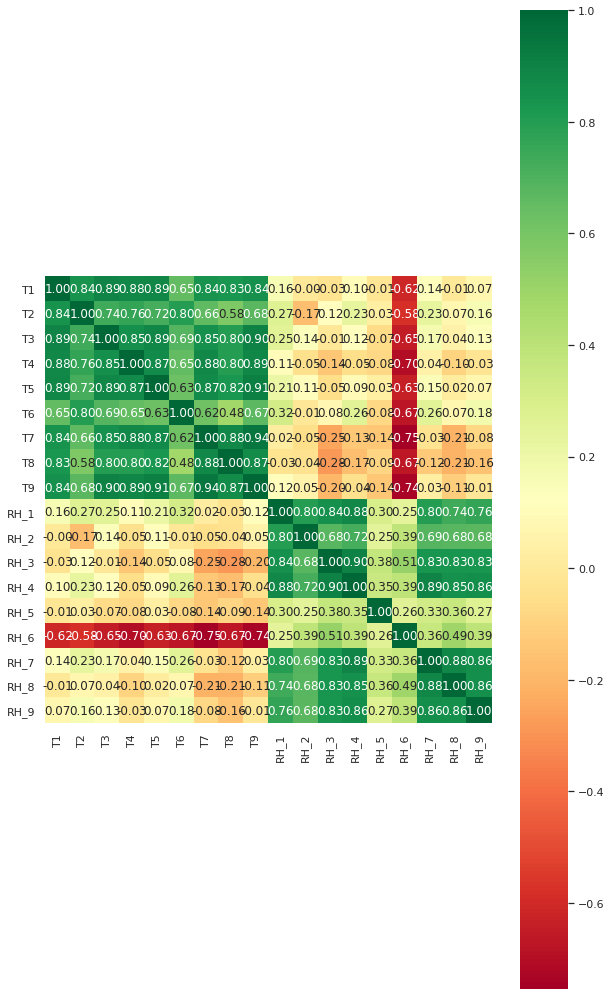

In [ ]:

corr = df[col_temp+col_hum].corr()
plt.figure(figsize = (10,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f')
plt.show();

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'exact_date', 'hours',
       'seconds', 'week', 'weekday'],
      dtype='object')

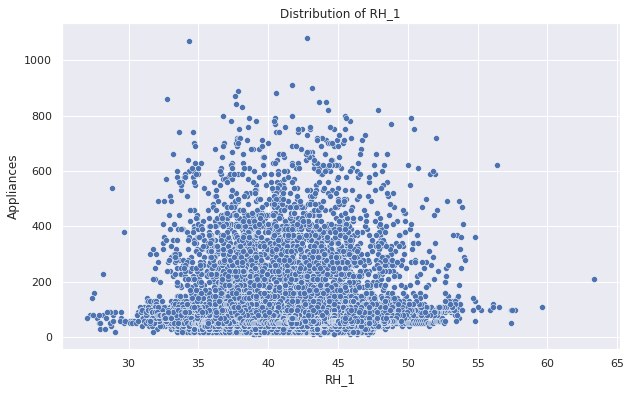

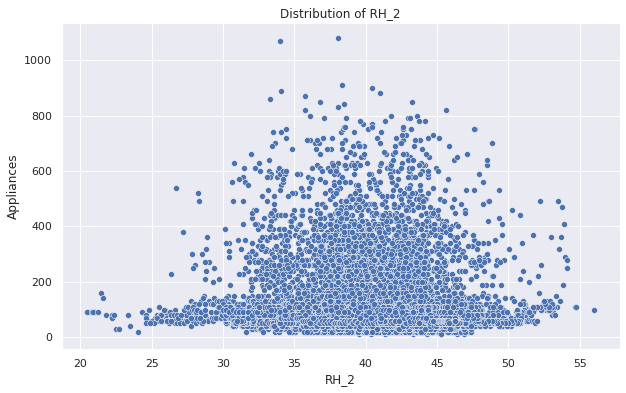

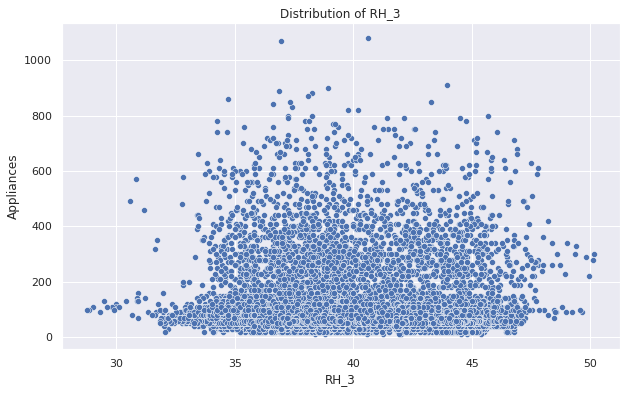

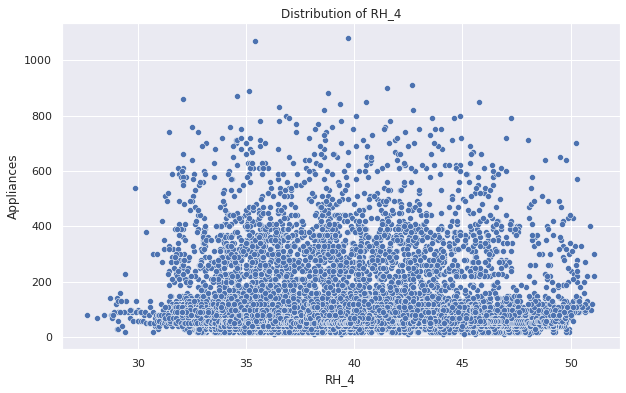

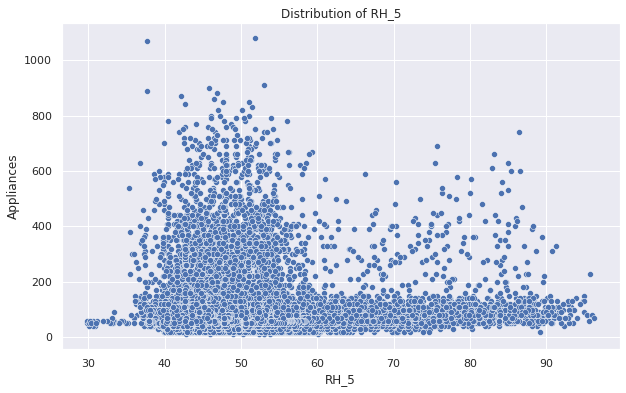

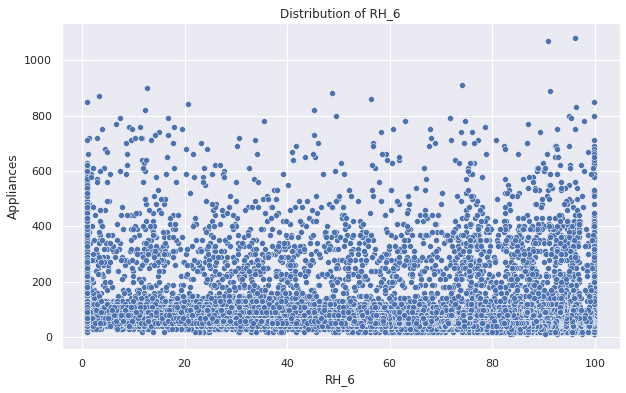

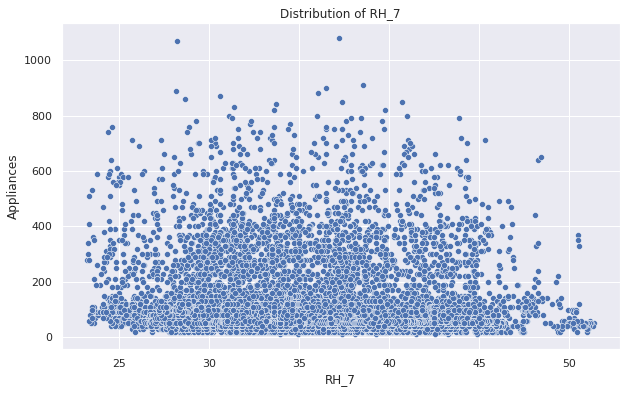

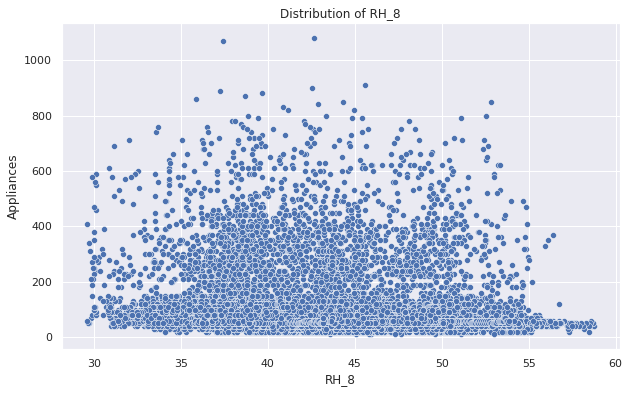

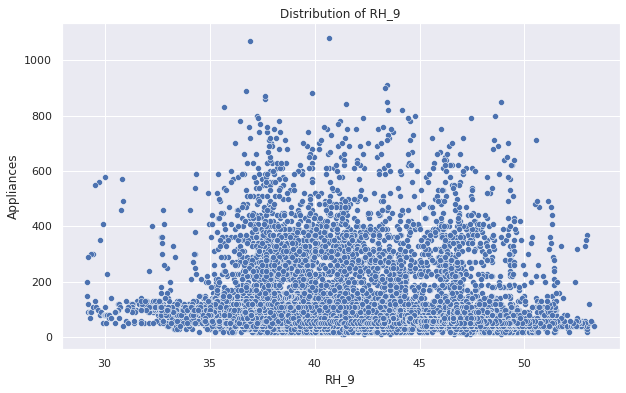

In [ ]:
for i, ii in enumerate(df[col_hum]):
  plt.figure(figsize = (10,6))
  sns.scatterplot(data=df, x=ii, y='Appliances')
  plt.title(f'Distribution of {ii}')
  plt.show()

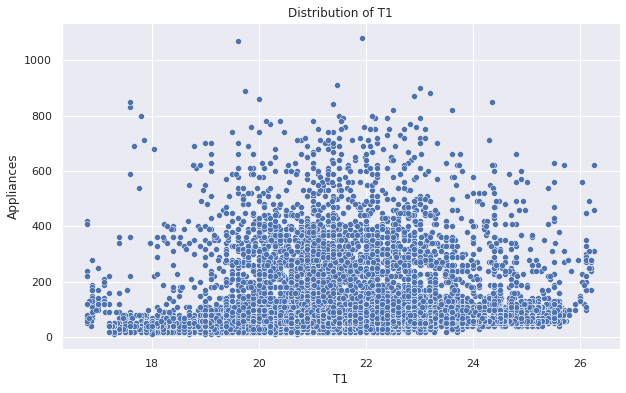

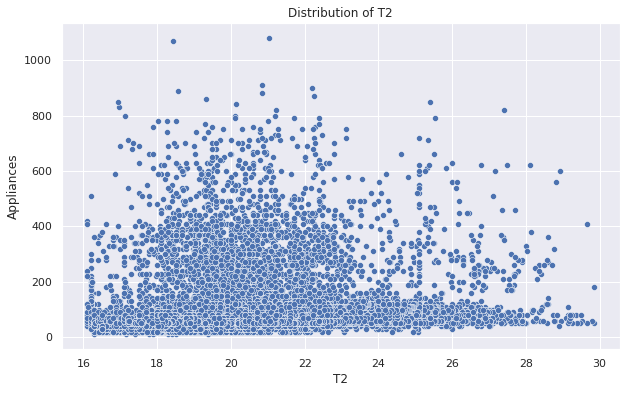

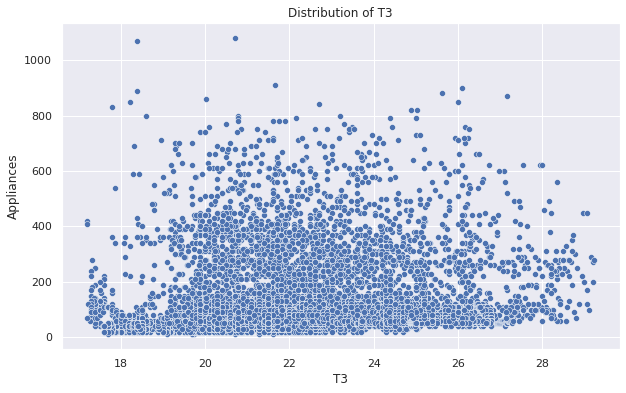

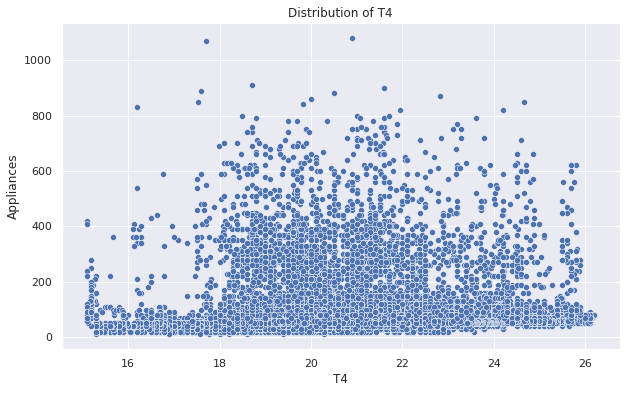

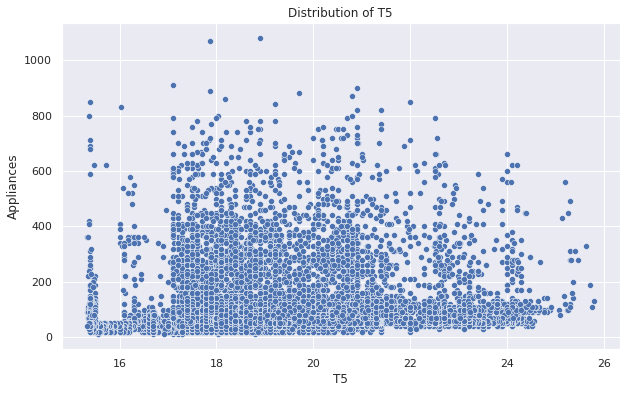

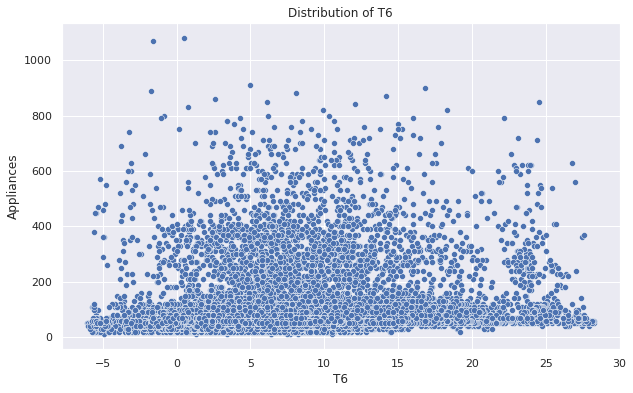

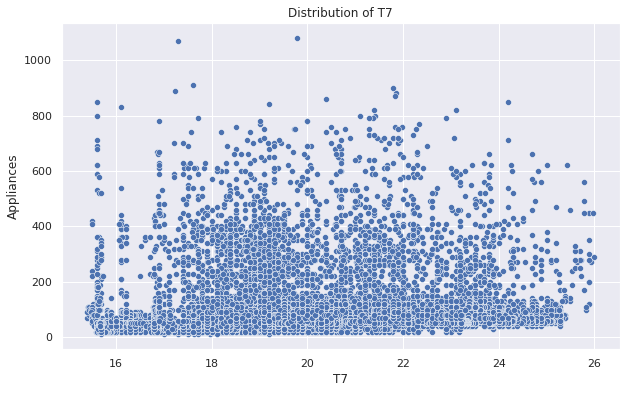

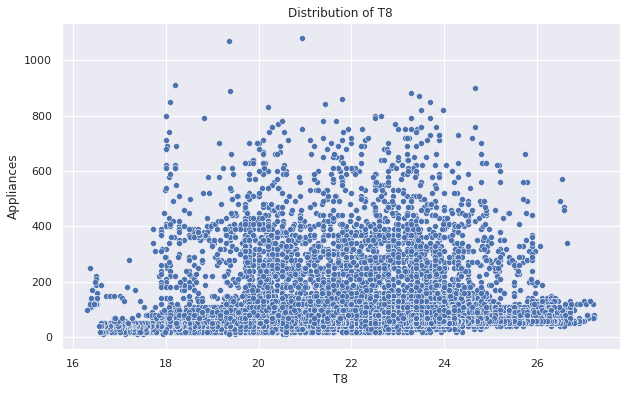

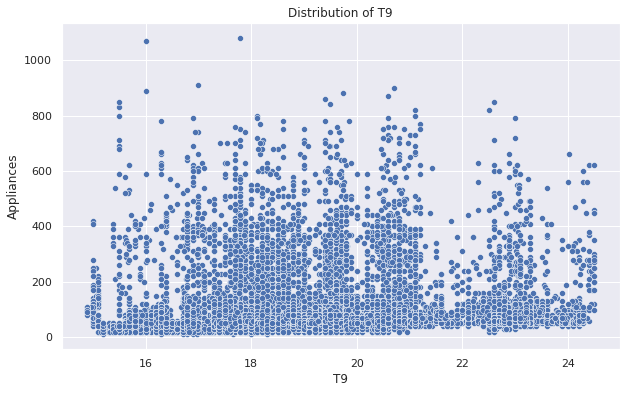

In [ ]:
for i, ii in enumerate(df[col_temp]):
  plt.figure(figsize = (10,6))
  sns.scatterplot(data=df, x=ii, y='Appliances')
  plt.title(f'Distribution of {ii}')
  plt.show()